<a href="https://colab.research.google.com/github/anuj7860/PRODIGY_DS_4/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
data = pd.read_csv("accident12.csv")


In [33]:
data['Date'] = pd.to_datetime(data['Date'])

In [34]:
data['Time'] = data['Date'].dt.hour

In [35]:
label_encoder = LabelEncoder()
data['Time'] = label_encoder.fit_transform(data['Time'])


In [36]:
features = ['Severity', 'Weather_Condition', 'Road_Conditions', 'Time']
data = data[features]


In [37]:
data.dropna(inplace=True)


In [38]:
label_encoders = {}
for column in ['Weather_Condition', 'Road_Conditions']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [39]:
X = data.drop('Severity', axis=1)
y = data['Severity']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
X_train.head()

,Weather_Condition,Road_Conditions,Time
10145,5,4,0
22363,1,0,0
14237,4,4,0
15790,1,0,0
2507,1,0,0


In [42]:
X_test.head()

,Weather_Condition,Road_Conditions,Time
15364,1,0,0
1484,1,0,0
14552,1,0,0
14561,5,4,0
9312,1,0,0


In [43]:
for col in X_train.columns:
    if X_train[col].dtype == "object":
        print(col)

In [44]:
X_train["Weather_Condition"] = pd.to_numeric(X_train["Weather_Condition"])
X_test["Weather_Condition"] = pd.to_numeric(X_test["Weather_Condition"])


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = model.predict(X_test_scaled)


In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8586152812009858
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00        75
       Fetal       0.00      0.00      0.00         6
     Serious       0.00      0.00      0.00       550
      Slight       0.86      1.00      0.92      3832

    accuracy                           0.86      4463
   macro avg       0.21      0.25      0.23      4463
weighted avg       0.74      0.86      0.79      4463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


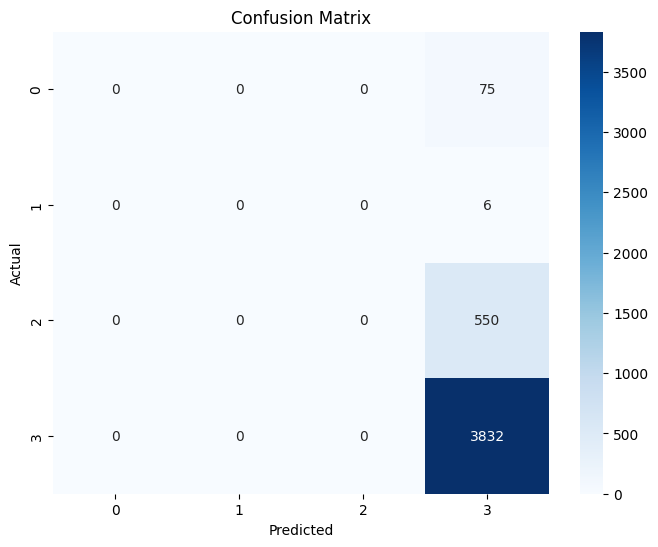

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-50-bee86317a48f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


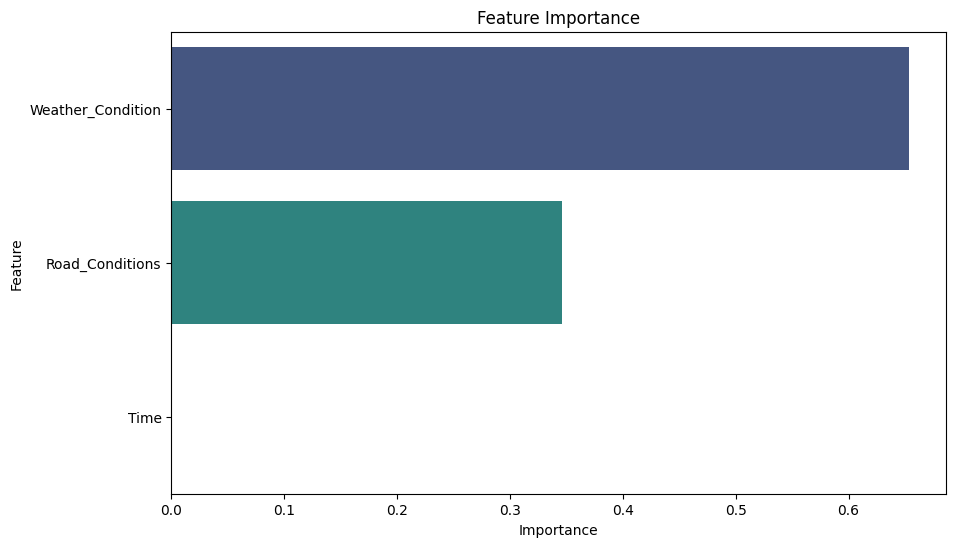

In [50]:
feature_importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()